In [2]:
import nltk
import string
import pandas as pd
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import snowball
from nltk.corpus import stopwords
import PyPDF2
from glob import glob, glob1
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\doonl\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\doonl\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
path = './txtFile/'

data = pd.DataFrame(columns=['id', 'abstract', 'keywords'])
for i in glob1('./txtFile/', '*'):
    with open(path + i, 'r', encoding='utf8') as f:
        doc_id = i.split('.')[-2]
        readingAbstract = False
        readingKeywords = False
        abstract_sent = []
        keyword_list = []
        keyword_clean = []
        for j in f:
            line = j.strip()
            if line == 'Keywords:' and readingKeywords is False:
                readingKeywords = True
                readingAbstract = False
                continue
            if line == 'Abstract' and readingAbstract is False:
                readingAbstract = True
                continue
            if readingAbstract is True:
                abstract_sent.append(line)
            if readingKeywords is True:
                keyword_list.append(line)
        abstract_para = ' '.join(abstract_sent)
        keyword_split = keyword_list[0].split(',')
        # print(abstract_para)
        # print(keyword_split)
        for x in keyword_split:
            keyword_lower = x.lower()
            keyword_no_space = keyword_lower.replace(' ', '')
            keyword_underscore = keyword_no_space.replace('_', ' ')
            keyword_clean.append(keyword_underscore)
        # print(keyword_clean)

        data = data.append({"id": doc_id, "abstract": abstract_para, "keywords": keyword_clean}, ignore_index=True)
    f.close()

display(data)


C:\Users\doonl\AppData\Local\Temp\ipykernel_25696\2526147678.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({"id": doc_id, "abstract": abstract_para, "keywords": keyword_clean}, ignore_index=True)
C:\Users\doonl\AppData\Local\Temp\ipykernel_25696\2526147678.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({"id": doc_id, "abstract": abstract_para, "keywords": keyword_clean}, ignore_index=True)
C:\Users\doonl\AppData\Local\Temp\ipykernel_25696\2526147678.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({"id": doc_id, "abstract": abstract_para, "keywords": keyword_clean}, ignore_index=True)
C:\Users\doonl\AppData\Local\Temp\ipykernel_25696\2526147678.py:36:

,id,abstract,keywords
0,1,"In the logistic management, the cost reduction...","[artificial intelligence, genetic algorithm]"
1,10,Word segmentation is an important pre-processi...,[deep learning]
2,11,Loss estimation is considerably significant fo...,[network resource planning]
3,12,This thesis presents a computational study on...,"[audio-synchronization, facial expression]"
4,13,The financial problem is a challenging task fo...,"[deep learning, distributional reinforcement l..."
5,14,Since a classical computer has a limitation to...,"[quantum random walk, quantum computer simulator]"
6,15,Hyperparameter Tuning chooses optimal hyperpar...,"[hyperparameter tuning, random search]"
7,16,The honeybee is a social insect that communica...,"[convolutional neural networks, feature extrac..."
8,17,System logs contain the complete information o...,"[alice, convolutional neural network]"
9,18,Handling an imbalanced class problem is a chal...,"[classification, probabilistic distribution]"


In [4]:
data.count()

id          18
abstract    18
keywords    18
dtype: int64

In [5]:
data_explode = data.explode('keywords').reset_index(drop=True)

In [8]:
wordkey = data_explode['keywords'].tolist()
wordkey

['artificial intelligence',
 'genetic algorithm',
 'deep learning',
 'network resource planning',
 'audio-synchronization',
 'facial expression',
 'deep learning',
 'distributional reinforcement learning',
 'quantum random walk',
 'quantum computer simulator',
 'hyperparameter tuning',
 'random search',
 'convolutional neural networks',
 'feature extraction',
 'alice',
 'convolutional neural network',
 'classification',
 'probabilistic distribution',
 'genetic algorithm',
 'gradient boosting',
 'alice',
 'cern',
 'deep learning',
 'long short term memory',
 'abstractive text summarization',
 'covid-19',
 'acoustic-to-articulatory inversion',
 'deep learning',
 'natural language processing',
 'topic modeling',
 'document mining',
 'graph analysis',
 'natural language processing']

In [279]:
data_explode

,id,abstract,keywords
0,1,"In the logistic management, the cost reduction...",artificial intelligence
1,1,"In the logistic management, the cost reduction...",combinatorial optimization
2,1,"In the logistic management, the cost reduction...",vehicle routing problem
3,1,"In the logistic management, the cost reduction...",hard time windows
4,1,"In the logistic management, the cost reduction...",meta heuristic
...,...,...,...
78,9,Understanding and interpretation of legislativ...,coreference resolution
79,9,Understanding and interpretation of legislativ...,legal processing
80,9,Understanding and interpretation of legislativ...,natural language processing
81,9,Understanding and interpretation of legislativ...,semantic meaning representations


In [280]:
data_u = data_explode['keywords'].unique()
data_u

array(['artificial intelligence', 'combinatorial optimization',
       'vehicle routing problem', 'hard time windows', 'meta heuristic',
       'genetic algorithm', 'attention', 'deep learning', 'thai language',
       'word segmentation', 'network resource planning', 'traffic model',
       'queuing network', 'stochastic model', 'audio-synchronization',
       'facial expression', 'facial movement', 'speech production',
       'distributional reinforcement learning', 'portfolio management',
       'circuit depth', 'computing wall-time', 'quantum random walk',
       'quantum computer simulator', 'abc', 'anova', 'classification',
       'grid search', 'hyperparameter tuning', 'random search',
       'convolutional neural networks', 'feature extraction',
       'hissing signal', 'machine learning', 'monitoring beehive',
       'alice', 'anomaly detection', 'cern',
       'convolutional neural network', 'self-attention', 'transformer',
       'imbalanced dataset', 'oversampling', 'probab

In [281]:
data_explode['keywords'].duplicated().any

<bound method NDFrame._add_numeric_operations.<locals>.any of 0     False
1     False
2     False
3     False
4     False
      ...  
78    False
79    False
80     True
81    False
82    False
Name: keywords, Length: 83, dtype: bool>

In [282]:
data_explode['word_id'] = pd.factorize(data_explode.keywords)[0]
data_explode

,id,abstract,keywords,word_id
0,1,"In the logistic management, the cost reduction...",artificial intelligence,0
1,1,"In the logistic management, the cost reduction...",combinatorial optimization,1
2,1,"In the logistic management, the cost reduction...",vehicle routing problem,2
3,1,"In the logistic management, the cost reduction...",hard time windows,3
4,1,"In the logistic management, the cost reduction...",meta heuristic,4
...,...,...,...,...
78,9,Understanding and interpretation of legislativ...,coreference resolution,66
79,9,Understanding and interpretation of legislativ...,legal processing,67
80,9,Understanding and interpretation of legislativ...,natural language processing,52
81,9,Understanding and interpretation of legislativ...,semantic meaning representations,68


In [283]:
data_explode[data_explode['keywords'] == 'deep learning'].tail()

,id,abstract,keywords,word_id
7,10,Word segmentation is an important pre-processi...,deep learning,7
19,13,The financial problem is a challenging task fo...,deep learning,7
57,4,Due to the emerging of Long Short-Term Memory ...,deep learning,7
66,6,This thesis proposed a speech production acqui...,deep learning,7


In [284]:
data_explode.describe()

,word_id
count,83.000000
mean,33.337349
std,20.157476
min,0.000000
25%,15.500000
50%,33.000000
75%,51.500000
max,69.000000


In [285]:
x = data_explode['abstract'].values
y = data_explode['word_id'].values

In [297]:
# import numpy as np
# max_sent = np.max(len(x))
# max_sent
# np.max(len(x))
maxlen = len(max(x, key = len))
maxlen

1853

In [299]:
x[0:10]

array(['In the logistic management, the cost reduction for delivering the  goods to customer s is crucial to save the budget of the company . Since decades ago, various Vehicle Routing Problems (VRPs ) have been emerged enormously to improve the productivity and to reduce the logistic cost of the industry . Among them, Vehicle Routing Problem with Time Windows  (VRPTW ) is one of the most fundamental VRP variants and one of the most applicable variants in the real-world case studies. In this study , VRPTW with  hard time windows is solved  by developing a special Genetic Algorithm (GA), composed of a problem -specific crossover operator and seven different mutation operators. The proposed GA has better results with  the heuristic mutation among seven operators while exploring the new and better features in large search space. The results of the algorithm are tested on the popular Solomon benchmark 100 - customer datasets. The results show that the proposed GA is quite comparable  with 

In [300]:
y[0:10]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [288]:
from keras import *
from keras import layers
from keras.preprocessing import text
from keras.preprocessing import sequence
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [289]:
# Split train & test sets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.4,random_state=0)
# Split train validate sets
x_train,x_val,y_train,y_val = train_test_split(x,y,test_size =0.4,random_state=0)

Text(0.5, 1.0, 'y val')

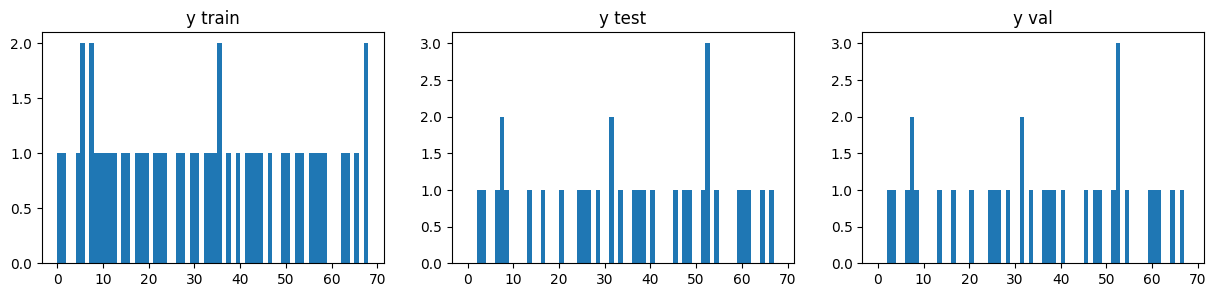

In [290]:
# Plot the target distributions
fig, ax = plt.subplots(1, 3, figsize=(15, 3))

bins = list(range(69))

ax[0].hist(y_train, bins=bins)
ax[0].set_title('y train')
ax[1].hist(y_test, bins=bins)
ax[1].set_title('y test')
ax[2].hist(y_val, bins=bins)
ax[2].set_title('y val')


In [291]:
max_word = 15000
# maxlen = 20
max_features = 15000

In [292]:
# Define Tokenizer
# define corpus to keep the maximum number of words
tokenizer = text.Tokenizer(num_words=max_word)
tokenizer.fit_on_texts(x_train)


In [293]:
tokenizer.word_index


{'the': 1,
 'and': 2,
 'of': 3,
 'to': 4,
 'in': 5,
 'a': 6,
 'is': 7,
 'on': 8,
 'with': 9,
 'for': 10,
 'this': 11,
 'data': 12,
 'from': 13,
 'model': 14,
 'that': 15,
 'are': 16,
 'were': 17,
 'using': 18,
 'learning': 19,
 'was': 20,
 'based': 21,
 'an': 22,
 'network': 23,
 'time': 24,
 'system': 25,
 'proposed': 26,
 'by': 27,
 'study': 28,
 'performance': 29,
 'results': 30,
 'can': 31,
 'text': 32,
 'models': 33,
 'has': 34,
 'quantum': 35,
 'which': 36,
 'method': 37,
 'it': 38,
 'as': 39,
 'applied': 40,
 'algorithm': 41,
 'machine': 42,
 'used': 43,
 'research': 44,
 'speech': 45,
 'be': 46,
 'dataset': 47,
 'been': 48,
 'problem': 49,
 'different': 50,
 'features': 51,
 'amr': 52,
 'we': 53,
 'new': 54,
 'ga': 55,
 'best': 56,
 'thai': 57,
 'number': 58,
 'have': 59,
 'tuning': 60,
 'one': 61,
 'random': 62,
 'coreference': 63,
 'meaning': 64,
 'our': 65,
 'many': 66,
 'problems': 67,
 's': 68,
 'than': 69,
 'analysis': 70,
 'techniques': 71,
 'processing': 72,
 'circuit':

In [296]:
tokenizer.


AttributeError: 'Tokenizer' object has no attribute 'length'

In [262]:
from keras.utils import pad_sequences
def preprocess_fn(data):
    sequences = tokenizer.texts_to_sequences(data)
    padding_sequences = pad_sequences(sequences,maxlen = maxlen)
    
    return padding_sequences,sequences

In [263]:
len(max(x_train, key=len))


1853

In [264]:
x_train,sequences_x_train =  preprocess_fn(x_train)
x_val,sequences_x_val = preprocess_fn(x_val)
x_test,sequences_x_test = preprocess_fn(x_test)

In [265]:
x_train.shape


(49, 1853)

In [266]:
len(max(x_train, key=len))


1853

In [267]:
x_train


array([[  0,   0,   0, ...,   3, 453, 104],
       [  0,   0,   0, ..., 141, 194, 489],
       [  0,   0,   0, ...,   1, 118, 515],
       ...,
       [  0,   0,   0, ..., 130, 701, 276],
       [  0,   0,   0, ...,  76, 123,  71],
       [  0,   0,   0, ...,  76, 123,  71]])

In [268]:
sequences_x_train


[[42,
  19,
  2,
  603,
  604,
  59,
  605,
  321,
  322,
  283,
  5,
  66,
  606,
  607,
  41,
  187,
  60,
  148,
  206,
  31,
  323,
  4,
  608,
  29,
  3,
  14,
  426,
  609,
  42,
  207,
  7,
  61,
  3,
  1,
  284,
  21,
  33,
  5,
  36,
  1,
  29,
  31,
  610,
  611,
  612,
  8,
  124,
  208,
  60,
  148,
  125,
  3,
  1,
  14,
  252,
  613,
  614,
  3,
  1,
  41,
  89,
  110,
  1,
  29,
  2,
  171,
  3,
  1,
  60,
  74,
  615,
  4,
  46,
  616,
  5,
  617,
  5,
  11,
  450,
  53,
  26,
  22,
  149,
  21,
  8,
  137,
  41,
  55,
  5,
  74,
  3,
  207,
  60,
  1,
  55,
  7,
  618,
  43,
  5,
  1,
  90,
  619,
  620,
  209,
  3,
  1,
  210,
  4,
  324,
  150,
  325,
  67,
  53,
  326,
  1,
  55,
  451,
  327,
  148,
  137,
  4,
  621,
  1,
  148,
  206,
  3,
  207,
  2,
  188,
  1,
  56,
  208,
  328,
  3,
  1,
  137,
  125,
  5,
  622,
  53,
  117,
  65,
  56,
  208,
  9,
  1,
  30,
  13,
  211,
  75,
  623,
  90,
  2,
  62,
  149,
  212,
  624,
  138,
  3,
  12,
  65,
  26,
  41,

In [269]:
rnn = models.Sequential()
rnn.add(layers.Embedding(max_features,512,input_length=maxlen))

rnn.add(layers.SimpleRNN(512))
rnn.add(layers.Dense(256,activation='relu'))
rnn.add(layers.Dense(70,activation='softmax'))

In [270]:
rnn.compile(optimizer='rmsprop',
            loss='sparse_categorical_crossentropy', metrics=['acc'])


In [271]:
rnn.summary()


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 1853, 512)         7680000   
                                                                 
 simple_rnn_9 (SimpleRNN)    (None, 512)               524800    
                                                                 
 dense_18 (Dense)            (None, 256)               131328    
                                                                 
 dense_19 (Dense)            (None, 70)                17990     
                                                                 
Total params: 8,354,118
Trainable params: 8,354,118
Non-trainable params: 0
_________________________________________________________________


In [272]:
his =  rnn.fit(x_train,y_train,epochs=10,batch_size=64,validation_data=(x_val,y_val))

Epoch 1/10
1/1 [==============================] - 18s 18s/step - loss: 4.2573 - acc: 0.0000e+00 - val_loss: 4.4034 - val_acc: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 23s 23s/step - loss: 3.4613 - acc: 0.3265 - val_loss: 4.3708 - val_acc: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 35s 35s/step - loss: 3.6582 - acc: 0.2449 - val_loss: 5.1527 - val_acc: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 34s 34s/step - loss: 4.1708 - acc: 0.0408 - val_loss: 5.4715 - val_acc: 0.0588
Epoch 5/10
1/1 [==============================] - 34s 34s/step - loss: 3.9715 - acc: 0.0408 - val_loss: 6.2281 - val_acc: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 35s 35s/step - loss: 4.2715 - acc: 0.0408 - val_loss: 6.2182 - val_acc: 0.0000e+00
Epoch 7/10
1/1 [==============================] - 37s 37s/step - loss: 4.3298 - acc: 0.0204 - val_loss: 5.9450 - val_acc: 0.0000e+00
Epoch 8/10
1/1 [==============================] - 36s 36s/step - loss

In [273]:
# define a function to plot the result from training step
def show_result(history): 
    
    # Print the result from the last epoch
    print('Last train accuracy: %s'%history.history['acc'][-1])
    print('Last validation accuracy: %s'%history.history['val_acc'][-1])
    
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    
    epochs = range(1, len(loss) + 1)   
    
    # Define a subplot 
    fig, axs = plt.subplots(1,2,figsize=(15,4))
    
    # Plot loss
    loss_plot = axs[0]
    
    loss_plot.plot(epochs, loss, 'c--', label='Training loss')
    loss_plot.plot(epochs, val_loss, 'b', label='Validation loss')
    loss_plot.set_title('Training and validation loss')
    loss_plot.set_xlabel('Epochs')
    loss_plot.set_ylabel('Loss')
    loss_plot.legend()
    
    # Plot accuracy
    acc_plot = axs[1]
    
    acc_plot.plot(epochs, acc, 'c--', label='Training acc')
    acc_plot.plot(epochs, val_acc, 'b', label='Validation acc')
    acc_plot.set_title('Training and validation accuracy')
    acc_plot.set_xlabel('Epochs')
    acc_plot.set_ylabel('Accuracy')
    acc_plot.legend()

Last train accuracy: 0.040816325694322586
Last validation accuracy: 0.05882352963089943


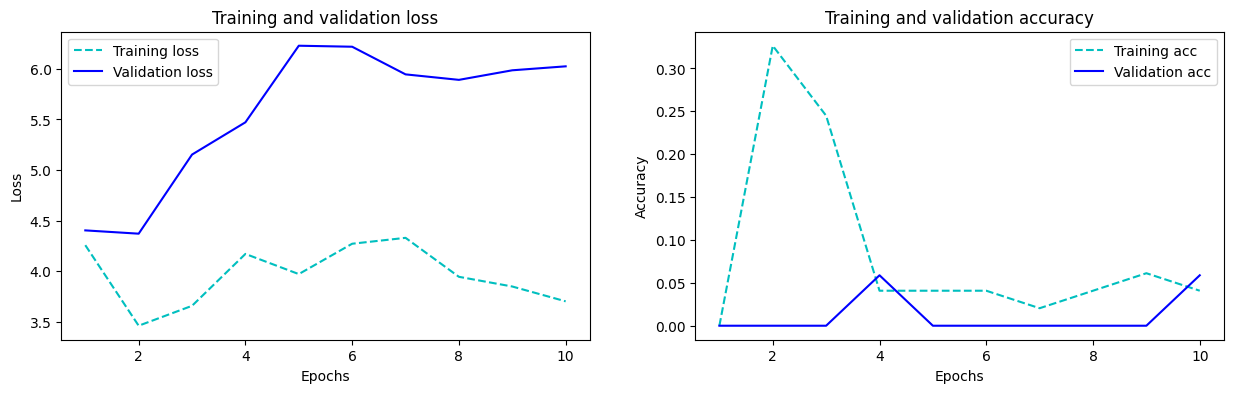

In [274]:
show_result(his)
